In [2]:
import numpy as np
from brian2 import *
import matplotlib.pyplot as plt

# Question 1

In [4]:
def sin_FHN(a, b, c, d, V_0, I, sim_time):
    #a = 0.02
    #b = 0.2
    #c = -65
    #d = 6

    eqs = """
    dV/dt = (0.04*V**2 + 5*V +140 - u + I(t)) /ms   :1
    du/dt = (a*(b*V - u)) /ms   :1
    """

    fhn_neuron = NeuronGroup(1, eqs, threshold='V>=30', reset='V=c; u+=d', method= 'euler')
    # initial values
    fhn_neuron.V = V_0
    fhn_neuron.u = "b*V"

    state_monitor = StateMonitor(fhn_neuron, ["V", "u"], record=True)
    fhn_net = Network(fhn_neuron)
    fhn_net.add(state_monitor)
    fhn_net.run(sim_time)
    return state_monitor

In [6]:
def create_ramp(I_):
    t_start = 10
    t_end = 300
    timing_array = np.zeros((t_end+2,))
    timing_array[t_start:t_end] = I_
    ramp_current = TimedArray(timing_array, dt=1.*ms)
    return ramp_current

WARNING    'V' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value array([[ 0.28      ,  0.28842105,  0.29684211, ...,  0.42315789,
         0.43157895,  0.44      ],
       [ 0.24842105,  0.25684211,  0.26526316, ...,  0.39157895,
         0.4       ,  0.40842105],
       [ 0.21684211,  0.22526316,  0.23368421, ...,  0.36      ,
         0.36842105,  0.37684211],
       ...,
       [-0.25684211, -0.24842105, -0.24      , ..., -0.11368421,
        -0.10526316, -0.09684211],
       [-0.28842105, -0.28      , -0.27157895, ..., -0.14526316,
        -0.13684211, -0.12842105],
       [-0.32      , -0.31157895, -0.30315789, ..., -0.17684211,
        -0.16842105, -0.16      ]]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


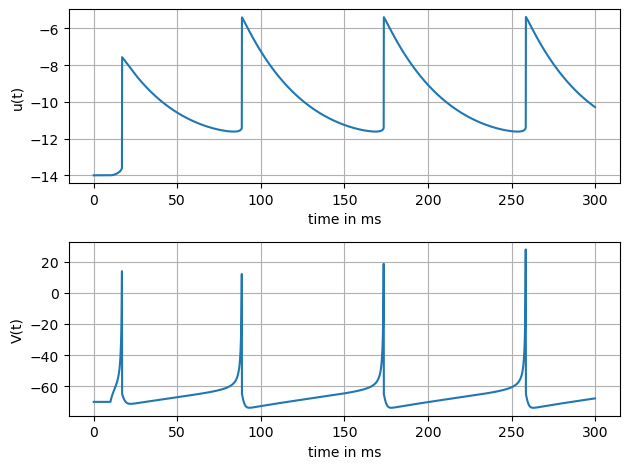

In [7]:
fig, axs = plt.subplots(2, 1)
states = sin_FHN(a=0.02, b=0.2, c=-65, d=6, V_0=-70, I=create_ramp(5), sim_time=300*ms)
axs[0].plot(states.t/ms, states.u[0])
axs[0].set_xlabel('time in ms')
axs[0].set_ylabel('u(t)')
axs[0].grid(True)

axs[1].plot(states.t/ms, states.V[0])
axs[1].set_xlabel('time in ms')
axs[1].set_ylabel('V(t)')
axs[1].grid(True)

fig.tight_layout()
plt.show()

The Izhikevich model is given as:
$\dot{V} = 0.04V^{2} + 5V + 140 -u + I$ 

$\dot{u} = a(bV - u)$

with four parameters a,b,c and d.

In order to get the nullclines we set $\dot{x}$ and $\dot{y}$ to be 0.

$\dot{V} = 0 \equiv 0.04V^{2} + 5V + 140 -u + I = 0$

$\dot{u} = 0 \equiv a = 0 $ or $bV = 0$

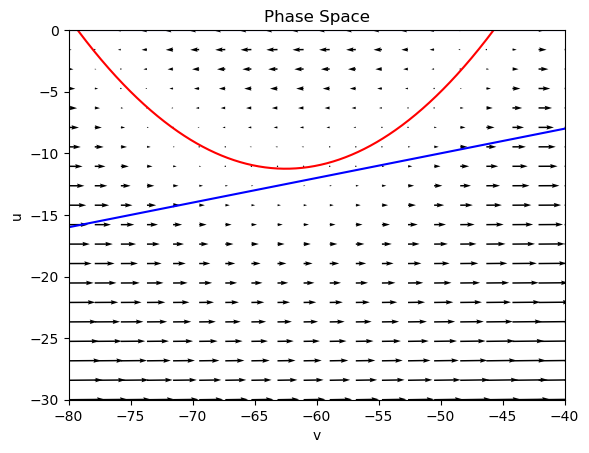

In [11]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy.integrate import odeint

a= 0.02
b = 0.2
I = 5

def n1(v,I):
    return I + 0.04*v**2 + 5*v + 140
def n2(v,b): 
    return b*v

v = np.linspace(-90,-40,1000)

plt.plot(v, n1(v, I), color='red')
plt.axvline(x = 0, color='red')
plt.plot(v, n2(v, b), color='blue')
plt.axhline(y = 0, color='blue')

plt.xlim(-80,-40)
plt.ylim(-30,0)

def vector_field(v, u):
    dv = I + 0.04*v**2 + 5*v + 140 -u
    du = a*(b*v - u)
    return dv, du

x_range = np.linspace(-80, -40, 20)
y_range = np.linspace(-30, 0, 20)

X, Y = np.meshgrid(x_range, y_range)

U, V = vector_field(X, Y)

plt.quiver(X, Y, U, V)


plt.xlabel('v')
plt.ylabel('u')
plt.title('Phase Space')

plt.show()